## Examen

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
plt.style.use('seaborn-poster')

### Parte 1

Tenemos que la aceleración dada por el enunciado es de la siguiente forma, usando con los valores dados como $R_1=1$ y $R_2=2$

$$a(y)=-\int_{1}^{2}dx\frac{y}{({x^2+y^2})^{3/2}}=f(x,y)$$

Usamos el valor de la nota que está en el enunciado y nos queda el siguiente resultado:

$$a(y)=-\frac{x}{y\sqrt{x^2+y^2}}\Biggr|_{1}^{2}$$

Resolviendo la ecuacion anterior, evaluandola en sus limites obtenemos que:

$$a(y)=-\frac{2}{y\sqrt{4+y^2}}+\frac{1}{y\sqrt{1+y^2}}$$

Para calcular esta integral usaremos el metodo Trapezoidal, que usa $k$ paneles, trataremos de dividirlo en la cantidad de paneles mas grande posible para obtener un resultado precisio.

Definimos primero la función de fuerza:

In [5]:
def fuerza(y):
    primer=-2/(y*np.sqrt(4+np.power(y,2)))
    segundo=1/(y*np.sqrt(1+np.power(y,2)))
    return (primer+segundo)

Ahora implementamos el metodo Trapezoidal para $n=1$

In [12]:
def Trapezoidal(y0,yf,I0, k):
    if k == 1:
        I = (fuerza(y0) + fuerza(yf))*(yf - y0)/2.0
    else:
        n = 2**(k - 1)
        h = (yf - y0)/n
        y = y0 + h/2.0
        suma = fuerza(y0)
        n=int(n)
        for i in range(1,n-1):
            if i%2==0:
                coef=4
            else:
                coef=2
            suma = suma + coef*fuerza(y)
            y = y + h/2
        suma=suma+fuerza(yf)
        I = (I0 + h*suma)/3.0
    return I

In [13]:
I0=0.0

Trapezoidal(2.24,0.01,I0,20)

0.33650801648009593

Se escoge el $H=2.24$, porque mi rut termina en 024-K, así que consideré al $K$ como 0.

### Parte 2

Ahora si usamos el valor que está en la nota quedamos con la siguiente ecuación:

$$a(y)=-\frac{x}{y\sqrt{x^2+y^2}}\Biggr|_{1}^{2}$$

Resolviendo la ecuacion anterior, evaluandola en sus limites obtenemos que:

$$a(y)=-\frac{2}{y\sqrt{4+y^2}}+\frac{1}{y\sqrt{1+y^2}}$$

Esta es la ecuación que buscamos.

Usamos la misma funcion $fuerza(y)$ que estaba definida en la parte 1.

Ya definida la función como un programa, creamos el programa que compara el valor analitico con el numerico.

In [233]:
def iterA(n,y0):
    y=np.linspace(y0,0,n)
    suma=0.0
    for i in range(0,n-1):
        suma+=fuerza(y[i])
    suma=suma*(-2.24)/n
    return suma

Dado que tenemos que $n=2^{k-1}$, reescribimos para obtener $n$. Aplicando logaritmo a ambos lados, obtenemos que:

$$log(n)=k-1$$

Reescribimos y obtenemos que:

$$log(n)+1=k$$

In [391]:
y0=2.24
n=500
tol=1e-3

In [395]:
n_Deseado=0
for i in range(30000,40000):
    valor1=iterA(n,y0)
    k=np.log(n)+1
    valor2=Trapezoidal(y0,0.01,I0,k)
    #print(valor1,valor2)
    if abs((valor1-valor2))<0.03:n gbc         
        n_Deseado=i
        break
    
print(n_Deseado)
print(valor1-valor2)

30000
-0.004825336808642722


Aceptamos que hay una diferencia de 0.004 entre los dos valores, lo que es bastante dado que los valores estan en los decimales. Así que tomamos un $N=30000$

### Parte 3

Ahora hay que implementar el metodo de Runge-Kutta de orden 4 para resolver la ecuacion en el paso 1.

El método de Runge Kutta a diferencia de los otros no es equispaciado por definición, por lo que para poder graficarlo hay que hacer una transformacion antes. Dicho esto este metodo constiste en definir 4 puntos, uno en $y$, otro en $y+\frac{h}{2}$ y el último en $y+h$. En el primer y ultimo punto se calcula la derivada una vez, mientras que en el punto del medio se calcula dos veces. Esto con el afan de mejorar la precision del método.

Tenemos la siguiente edo:
$$y''=f(t,y)$$

Esta EDO de segundo orden podemos reescribirla como dos EDOS de primer grado, definimos entonces las siguientes ecuaciones:

$$y''=\frac{dy'}{dy}=f_1(y,y')$$

$$y'=\frac{dy}{dt}=f_2(t,y)$$

Lo que basta es escribir una función para cada EDO, $f_1$ y $f_2$. Para $f_1$ esto es sencillo, este valor es simplemente el $F(t,y)$ que estaba definido antes.

Falta definir el valor de $f2$. Pero sabemos que el valor de $f_2$ y el de $f_1$ están relacionados entres sí, de hecho hasta lo podriamos ver a uno como la derivada del otro. En este caso lo vamos a ver simplemente como lo que es, como la derivada de $y$.

Definimos las siguientes variables: $y$,$y'$ para $y$. Definimos el vector $\vec{y}$ de la siguiente manera:

$$\vec{y}=\begin{bmatrix}
y \\
y'\\
\end{bmatrix}$$

Ahora definimos el vector $F$ que corresponde a las derivadas de las variables del vector $\vec{y}$:

$$F=\begin{bmatrix}
y' \\
\frac{-2}{y(4+y^2)^2}+\frac{1}{y(1+y^2)^2} \\
\end{bmatrix}
$$

Además tenemos las siguientes condiciones iniciales:
$$y(0)=2.24$$

$$y'(0)=0$$

Teniendo todo bajo la mesa llamamos al metodo de Runge-Kutta de Spicy.

In [357]:
y=np.array([2.24,0.0])
x=0.0
xStop=20
h=10
t=np.array([0,20])

In [338]:
def F(t,y):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=fuerza(y[0])
    return f

[0.00000000e+00 8.66603860e-03 9.53264246e-02 9.61930284e-01
 4.10387754e+00 5.90815047e+00 7.71431708e+00 9.52048369e+00
 1.27101824e+01 1.59570952e+01 1.76531183e+01 1.94270843e+01
 2.00000000e+01]
[[ 2.24000000e+00  2.23999997e+00  2.23999990e+00 ...  1.69768324e+00
   1.69792631e+00  1.69816932e+00]
 [ 0.00000000e+00 -7.68968876e-05 -1.53793777e-04 ...  3.64647573e-01
   3.64547501e-01  3.64447440e-01]]


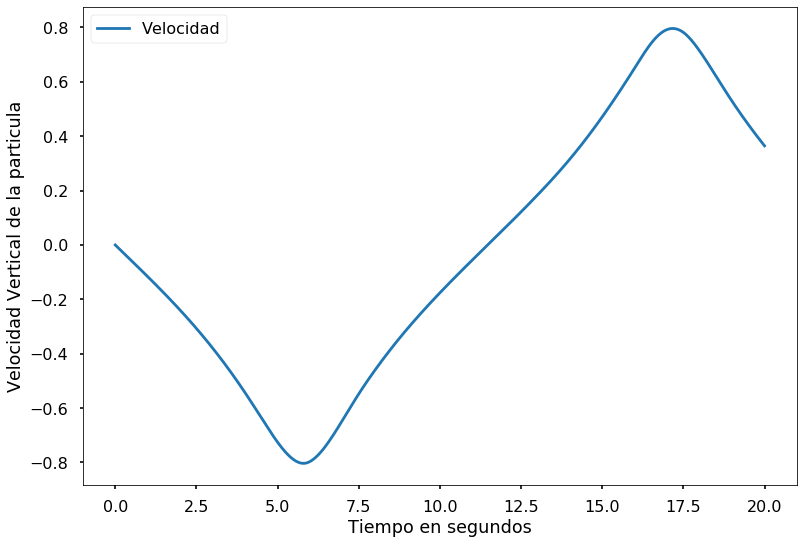

In [364]:
sol=solve_ivp(F,t,y,dense_output=True)
print(sol.t)
tiempo=np.linspace(0,xStop,30000)
y=sol.sol(tiempo)
print(y)

plt.plot(tiempo,y[1],label="Velocidad")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Velocidad Vertical de la particula")
plt.legend()

Podemos ver que al bajar llega a su maxima velocidad que es $-0.8$, y luego de esto esta sube con una velocidad de $0.8$, por lo que se puede ver que la velocidad de esta particula es simetrica en el eje $y$.

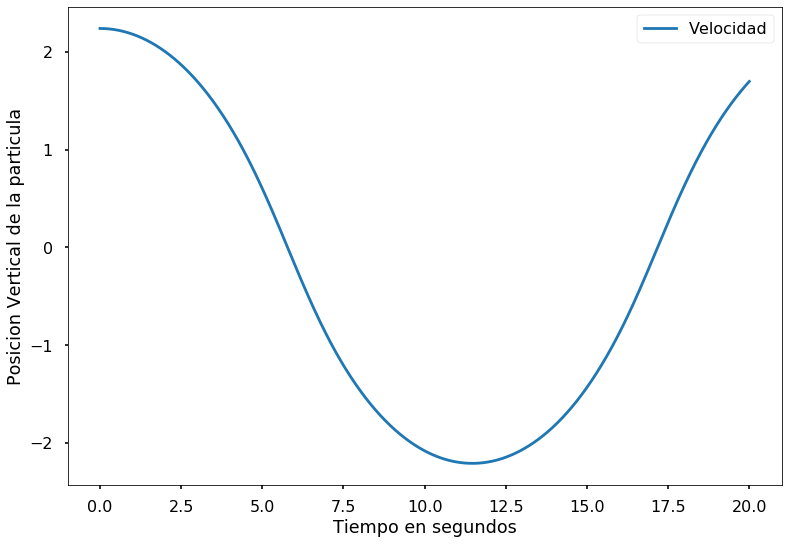

In [365]:
plt.plot(tiempo,y[0],label="Velocidad")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Posicion Vertical de la particula")
plt.legend()

Al ver la posicion, se aprecia que al lanzar la particula desde su posicion en H, esta vuelve a subir luego de llegar al minimo, que es el negativo de la posicion más alta. Luego al subir se acerca a la posicion inicial. Así que al igual que con la velocidad esta es simetrica en el eje $y$.

### Parte 4

Usando el valor de $y$ obtenido en la parte anterior. Buscamos el instante en que $y$ se vuelve cero, dado que sabemos que puede no estar el valor exacto, damos una cierta tolerancia para poder buscar el valor. 

In [388]:
tBuscado=0.0
for i in range(1,30000):
    if(y[0][i]<=0.00000000001):
        tBuscado=tiempo[i]
        break
        
print(tBuscado)

5.778859295309844


Dado los resultados sacamos como conclusion que la primera vez que la particula está en la posición cero ocurre en el segundo 5.7788 aproximadamente.

Viendo el gráfico de la posición podemos concluir que en efecto, esto se cumple, puesto que da un valor muy cercano al 6.